In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.shape

(8807, 8)

In [4]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Royal Enfield Bullet Electra 350cc 2011,2011,38998.0,first,bangalore,40.0,19.80,95000.0
1,Jawa Perak 330cc 2020,2020,2000.0,first,bangalore,NaN,30.00,197500.0
2,Hero CD Dawn 100cc 2005,2005,28000.0,first,ghaziabad,72.0,7.00,9000.0
3,KTM Duke 200cc 2012,2012,24561.0,third,bangalore,35.0,25.00,63400.0
4,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,NaN,first,hyderabad,40.0,20.21,130500.0


In [5]:
df.describe()

,model_year,kms_driven,mileage,power,price
count,8807.000000,6447.000000,7764.000000,8320.000000,8.772000e+03
mean,2015.296923,24227.728711,46.468465,18.857073,8.458634e+04
std,3.780764,30137.639084,16.616913,8.860959,7.774293e+04
min,1950.000000,0.000000,5.000000,7.000000,2.000000e+03
25%,2014.000000,9500.000000,35.000000,14.000000,4.000000e+04
50%,2016.000000,18000.000000,40.000000,19.000000,7.000000e+04
75%,2018.000000,30000.000000,58.000000,21.000000,1.150000e+05
max,2021.000000,1000000.000000,104.000000,197.300000,3.000000e+06


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [6]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [7]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
7892,Bajaj V15 150cc 2016,2016,10682.0,first,bangalore,57.0,11.8,38000.0,Bajaj
5482,TVS Apache RTR 180cc 2017,2017,NaN,first,ahmedabad,45.0,17.2,58200.0,TVS
2016,Royal Enfield Classic 350cc Signals Edition 2018,2018,46000.0,first,chitradurga,35.0,19.8,160000.0,Royal
3227,Suzuki Gixxer SF 150cc 2015,2015,21866.0,first,navi mumbai,40.0,14.6,48400.0,Suzuki
5785,UM Renegade Sport S 2019,2019,5000.0,first,delhi,35.0,24.8,90000.0,UM


In [8]:
df.brand.value_counts()

Bajaj               2488
Royal               1964
Hero                 997
Yamaha               893
TVS                  675
Honda                623
KTM                  591
Suzuki               256
UM                   135
Jawa                  54
Mahindra              38
Harley-Davidson       34
Hyosung               14
Husqvarna             13
Kawasaki               7
Benelli                7
BenelliImperiale       6
Fb                     4
Ducati                 3
Triumph                2
yamaha                 1
MV                     1
BMW                    1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [9]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [10]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
2685,Bajaj Pulsar 220cc 2011,2011,57000.0,first,surat,38.0,21.0,18500.0,Bajaj,220
4929,Royal Enfield Classic Chrome 500cc 2016,2016,15900.0,second,bangalore,32.0,27.2,128700.0,Royal,500
3681,Honda CB Shine 125cc 2015,2015,NaN,first,bangalore,65.0,10.0,52000.0,Honda,125
5650,Honda CB Shine 125cc 2015,2015,NaN,first,raigarh,65.0,10.0,38000.0,Honda,125
2545,Yamaha FZ16 150cc 2012,2012,NaN,second,agra,58.0,13.0,32600.0,Yamaha,150


### We can now drop the model_name feature

In [11]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [12]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [13]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [14]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [15]:
df.owner.unique()

array(['first', 'third', 'second', 'fourth'], dtype=object)

In [16]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [17]:
df.location.value_counts()[:10]

delhi        1583
mumbai        882
bangalore     843
pune          423
chennai       401
hyderabad     373
gurgaon       356
jaipur        351
ahmedabad     300
faridabad     189
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [18]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'mumbai', 'bangalore', 'pune', 'chennai'], dtype='object')


In [19]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [20]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 23


Bajaj     2488
Royal     1964
Hero       997
Yamaha     893
TVS        675
Honda      623
KTM        591
Suzuki     256
UM         135
Jawa        54
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [21]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [22]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [23]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [24]:
df.sample(4)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
3064,5979.0,first,other,40.0,19.80,80000.0,Royal Enfield,350,5
7706,28329.0,first,other,55.0,NaN,32000.0,Hero,110,6
261,NaN,first,other,NaN,34.50,107900.0,Bajaj,None,4
6793,NaN,second,other,29.0,26.15,37350.0,Honda,None,9


# Outlier Detection

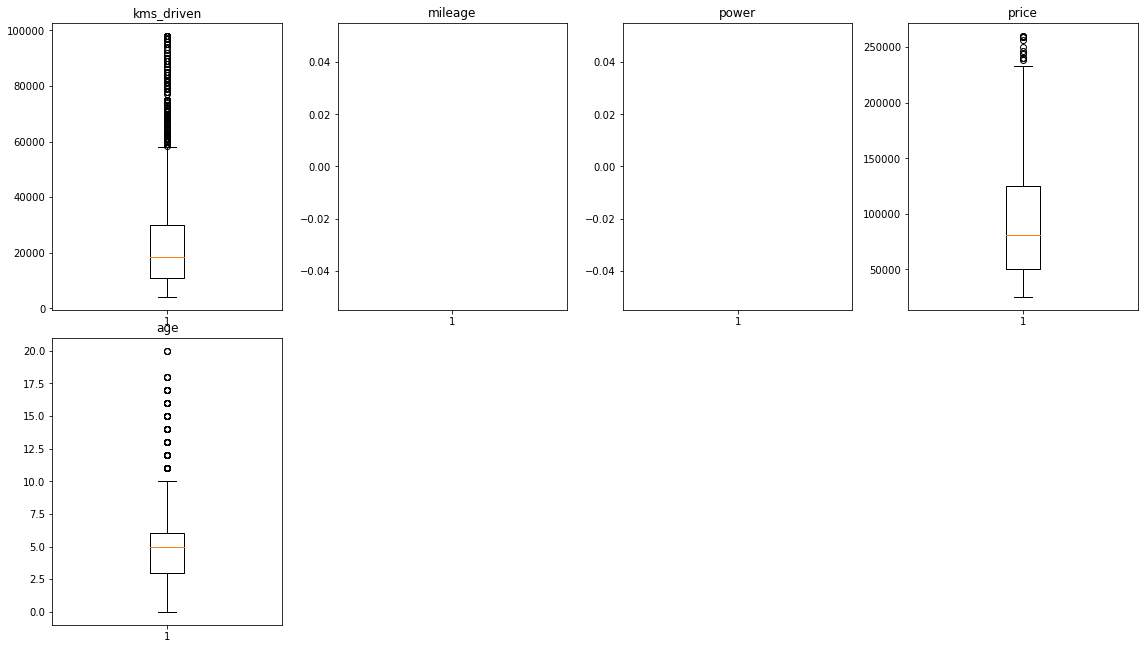

In [45]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

box_plot(df)

## kms_driven

In [26]:
max_val = df['kms_driven'].quantile(.99)

min_val = df['kms_driven'].quantile(.1)

df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

In [27]:
df.shape

(5745, 9)

<AxesSubplot:>

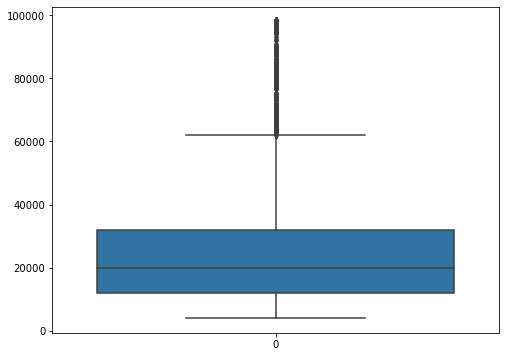

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [29]:
# max_val = df['mileage'].quantile(.99)

# min_val = df['mileage'].quantile(.1)

# df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

<AxesSubplot:ylabel='mileage'>

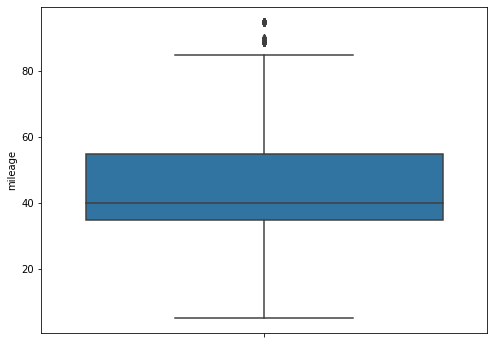

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

## Power

In [31]:
# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

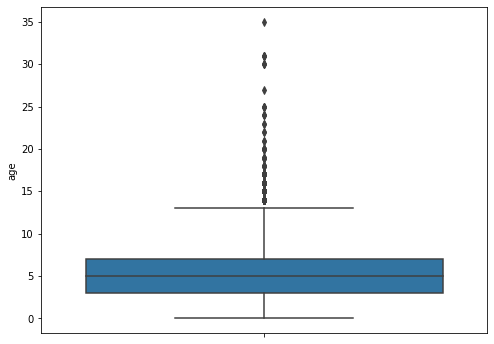

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [33]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
7417,9500.0,first,mumbai,35.0,25.0,196500.0,UM,None,3
2625,26000.0,first,other,40.0,24.2,62000.0,Bajaj,None,6
6960,13500.0,first,other,55.0,8.9,14000.0,Hero,125,11


In [34]:
df = df[df['age'] <= 20]

In [35]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1402,34000.0,second,chennai,37.0,19.8,85000.0,Royal Enfield,350,7
1419,9500.0,first,pune,22.0,33.0,198500.0,TVS,None,2
4070,13000.0,first,other,NaN,30.0,210000.0,Honda,None,0


<AxesSubplot:ylabel='age'>

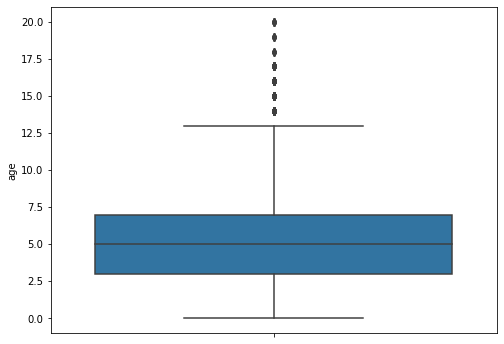

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [37]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

<AxesSubplot:ylabel='price'>

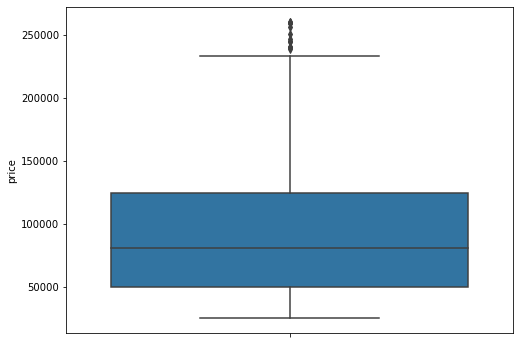

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [39]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
559,8941.0,first,delhi,NaN,14.6,82000.0,Suzuki,150,2
340,29000.0,first,mumbai,63.0,14.0,41000.0,Suzuki,150,6
3423,16000.0,first,delhi,25.0,27.2,82000.0,Royal Enfield,500,7
2110,26000.0,first,other,84.0,8.2,30300.0,Hero,100,6
1707,9000.0,first,pune,35.0,24.8,120000.0,UM,None,4


In [40]:
df.shape

(5015, 9)

In [41]:
df.isnull().sum()

kms_driven      0
owner           0
location        0
mileage       612
power         237
price           0
brand           0
engine        971
age             0
dtype: int64

In [42]:
# fill price with mean
df.price.fillna(df.price.mean(),inplace=True)

In [43]:
df.shape

(5015, 9)

## Save

In [44]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)